In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

print(tf.__version__)

2024-06-26 18:22:51.077711: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 18:22:51.104852: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 18:22:51.104883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 18:22:51.105535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 18:22:51.110028: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [3]:
# Loading data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
print(np.isnan(x_train).any())
print(np.isnan(x_test).any())

False
False


In [7]:
#Studying the data
print("len of ytrain", len(y_train))
print("shape of ytrain:", y_train.shape)
print("shape of xtrain:", x_train.shape)

len of ytrain 60000
shape of ytrain: (60000,)
shape of xtrain: (60000, 28, 28)


In [16]:
mnist_d = list(zip(x_train, y_train))
mnist_df = pd.DataFrame(mnist_d, columns=["image", "label"])

mnist_test_d = list(zip(x_test, y_test))
mnist_test_df = pd.DataFrame(mnist_test_d, columns=["image", "label"])

Text(0.5, 1.0, '5')

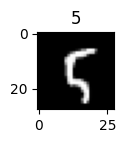

In [12]:
#plotting an image

image = x_train[100]
fig = plt.figure(figsize=(1, 1))
plt.imshow(image, cmap='grey')
plt.title(y_train[100])

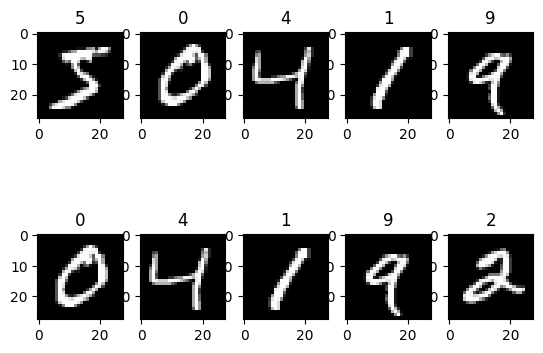

In [26]:
#plotting 5 images
fig, axes = plt.subplots(2, 5)
for row in range(2):
    for col in range(5):
        axes[row, col].imshow(x_train[row+col], cmap='grey')
        axes[row, col].set_title(str(y_train[row+col]))
plt.show()

<Axes: xlabel='label', ylabel='count'>

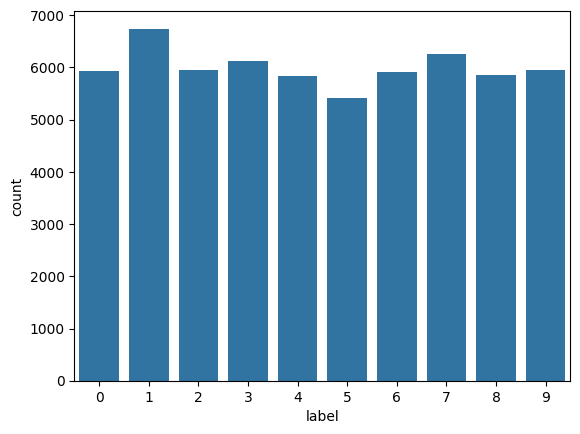

In [15]:
sns.countplot(data=mnist_df, x="label")

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
#we need to input_shape (28, 28, 1) for out cnn model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train = x_train/255.0

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test = x_test/255.0

In [30]:
#creating one hot encoding for labels

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

2024-06-26 19:24:01.801579: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 19:24:01.892704: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 19:24:01.892865: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [34]:
batch_size=64
num_classes=10
epochs=5

In [36]:
model_LeNet = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), padding="same", activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [40]:
model_LeNet.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [41]:
history = model_LeNet.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/5


2024-06-26 20:08:18.529107: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-26 20:08:18.661179: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-26 20:08:19.033814: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-26 20:08:19.207542: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ec1dd31d4e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-26 20:08:19.207559: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-06-26 20:08:19.217306: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719412699.278173   17550 devic

844/844 [==============================] - 5s 4ms/step - loss: 0.2338 - acc: 0.9269 - val_loss: 0.0682 - val_acc: 0.9807
Epoch 2/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0655 - acc: 0.9798 - val_loss: 0.0516 - val_acc: 0.9855
Epoch 3/5
844/844 [==============================] - 3s 3ms/step - loss: 0.0451 - acc: 0.9859 - val_loss: 0.0493 - val_acc: 0.9872
Epoch 4/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0356 - acc: 0.9887 - val_loss: 0.0404 - val_acc: 0.9895
Epoch 5/5
844/844 [==============================] - 2s 3ms/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0414 - val_acc: 0.9887


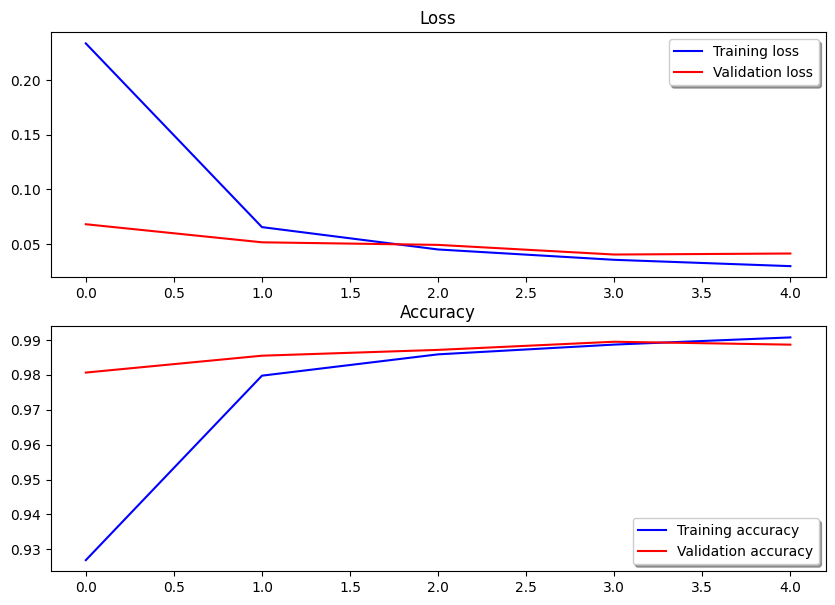

In [50]:
#plotting loss and accuracy curve for training and validation set

fig, axes = plt.subplots(2, 1, figsize=(10, 7))

axes[0].plot(history.history['loss'], color='b', label='Training loss')
axes[0].plot(history.history['val_loss'], color='r', label='Validation loss')
legend = axes[0].legend(loc='best', shadow=True)
axes[0].set_title("Loss")

axes[1].plot(history.history['acc'], color='b', label='Training accuracy')
axes[1].plot(history.history['val_acc'], color='r', label='Validation accuracy')
axes[1].set_title("Accuracy")
legend = axes[1].legend(loc='best', shadow=True)

In [52]:
test_loss, test_acc = model_LeNet.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0351 - acc: 0.9893


In [53]:
print(test_acc, test_loss)

0.989300012588501 0.0351133830845356


In [54]:
y_pred = model_LeNet.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [66]:
np.argmax(y_pred, axis=1)[1]

2

In [56]:
y_test[1]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [67]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [68]:
confusion_matrix = tf.math.confusion_matrix(y_test_classes, y_pred_classes)

<Axes: >

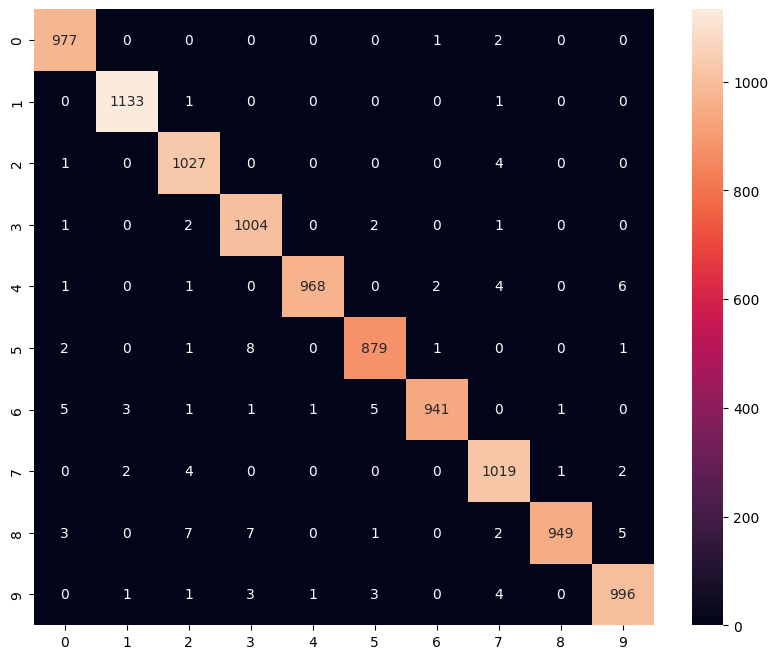

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [75]:
for i in range(500):
    if y_test_classes[i] != y_pred_classes[i]:
        print("image index::actual number::predicted number", i, y_test_classes[i], y_pred_classes[i])

image index::actual number::predicted number 184 8 3
image index::actual number::predicted number 259 6 0
image index::actual number::predicted number 445 6 0
image index::actual number::predicted number 447 4 7
image index::actual number::predicted number 449 3 5


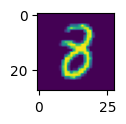

In [76]:
plt.figure(figsize=(1, 1))
plt.imshow(x_test[184])